In [1]:
import reciprocalspaceship as rs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.spatial as sp
import glob
import pandas as pd

In [5]:
# test = rs.read_mtz("./F_internal_200us_240uJ_diffmap_W0-05.mtz")
# test_control = rs.read_mtz("./F_internal_control_200us_240uJ_diffmap_W0-05.mtz")

In [6]:
# test

In [7]:
# test["sf"] = test.to_structurefactor("WDF", "PHIFMODEL")
# test_control["sf"] = test_control.to_structurefactor("WDF", "PHIFMODEL")

In [8]:
# reciprocalgrid = test.to_reciprocalgrid("sf", gridsize=(128, 128, 128))
# reciprocalgrid_control = test_control.to_reciprocalgrid("sf", gridsize=(128, 128, 128))

In [9]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(np.abs(reciprocalgrid[:, :, 1]))
# axes[0].set_title("Reciprocal Grid")
# axes[0].set_xticks([])
# axes[0].set_yticks([])
# axes[1].imshow(np.abs(np.fft.fftshift(reciprocalgrid[:, :, 1])))
# axes[1].set_title("Shifted Reciprocal Grid")
# axes[1].set_xticks([])
# axes[1].set_yticks([])
# plt.show()

In [10]:
# realmap = np.real(np.fft.fftn(reciprocalgrid))
# realmap_control = np.real(np.fft.fftn(reciprocalgrid_control))


In [11]:
# realmap.mean()

In [12]:
# np.corrcoef(realmap.flatten(),realmap_control.flatten())

In [13]:
# print(realmap_control.mean())
# print(realmap_control.std())

In [14]:
# realmap_control_shifted = (realmap_control - realmap_control.mean())

In [15]:
# realmap_control_shifted.mean()

In [16]:
# plt.figure(dpi=300)
# plt.hist(realmap.flatten(), bins=200, color='black')
# plt.vlines(0, ymin=0, ymax=100000, color='r')

In [17]:

# 1 - sp.distance.cdist(realmap, realmap, 'cosine')

In [18]:
# realmap.shape

In [19]:
# realmap_central = np.copy(realmap)
# realmap_central[realmap_central> realmap_central.std()*3]=0
# realmap_central[realmap_central< realmap_central.std()*-3]=0              

In [20]:
# plt.figure(dpi=300)
# plt.hist(realmap_central.flatten(), bins=200, color='black')
# plt.vlines(0, ymin=0, ymax=100000, color='r')

In [21]:
# realmap_control_central = np.copy(realmap_control)
# realmap_control_central[realmap_control_central> realmap_control_central.std()*3]=0
# realmap_control_central[realmap_control_central< realmap_control_central.std()*-3]=0

In [22]:
# np.corrcoef(realmap_central.flatten(),realmap_control_central.flatten())

In [23]:
# realmap_control_3sigma = np.copy(realmap_control)
# realmap_control_3sigma[np.logical_and(realmap_control_3sigma>=realmap_control_3sigma.std()*-3, realmap_control_3sigma<=realmap_control_3sigma.std()*3)]=0

In [24]:
# realmap_control_3sigma_dropzeros = np.copy(realmap_control_3sigma)
# realmap_control_3sigma_dropzeros[realmap_control_3sigma_dropzeros==0]=np.nan
# plt.figure(dpi=300)
# plt.hist(realmap_control_3sigma_dropzeros.flatten(), bins=200, color='black')
# plt.vlines(0, ymin=0, ymax=100, color='r')

In [25]:
# realmap_3sigma = np.copy(realmap)
# realmap_3sigma[np.logical_and(realmap_3sigma>=realmap_3sigma.std()*-3, realmap_3sigma<=realmap_3sigma.std()*3)]=0

In [26]:
# np.corrcoef(realmap_3sigma.flatten(),realmap_control_3sigma.flatten())

In [2]:
files = glob.glob("./diff_maps_refinedPHI/*.mtz")

In [3]:
files

['./diff_maps_refinedPHI/lys_simulated_1.05Bfac_diffmap_W0-05.mtz',
 './diff_maps_refinedPHI/F_internal_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/lys_simulated_1.2Bfac_diffmap_W0-05.mtz',
 './diff_maps_refinedPHI/F_internal_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_20us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/lys_simulated_1.1Bfac_diffmap_W0-05.mtz',
 './diff_maps_refinedPHI/F_internal_chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_20us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_20ns_540uJ_extrapmap_W0-05_N1.mtz']

In [4]:
# volume_0-035eA_to_sigma_dict = 

In [5]:
names_zero = [file.replace("./diff_maps_refinedPHI/","") for file in files]
names_init = [file.replace("F_internal_","") for file in names_zero]
names = [file.replace("_diffmap_W0-05.mtz","") for file in names_init]

In [6]:
names.sort()

In [7]:
names

['200us_540uJ_extrapmap_W0-05_N1.mtz',
 '20ns_540uJ_extrapmap_W0-05_N1.mtz',
 '20us_540uJ_extrapmap_W0-05_N1.mtz',
 'chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 'chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 'control_200us_540uJ_extrapmap_W0-05_N1.mtz',
 'control_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 'control_20us_540uJ_extrapmap_W0-05_N1.mtz',
 'control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 'control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 'lys_simulated_1.05Bfac',
 'lys_simulated_1.1Bfac',
 'lys_simulated_1.2Bfac']

In [8]:
volume_to_sigma_vals = [2.34, 1.67, 2.6, 1.57, 1.6, 2.7, 3.4, 3.4, 3.2, 3.2, 6.3, 3.2, 1.7]

In [9]:
volume_to_sigma = dict(zip(names,volume_to_sigma_vals))

In [10]:
volume_to_sigma

{'200us_540uJ_extrapmap_W0-05_N1.mtz': 2.34,
 '20ns_540uJ_extrapmap_W0-05_N1.mtz': 1.67,
 '20us_540uJ_extrapmap_W0-05_N1.mtz': 2.6,
 'chito_200us_540uJ_extrapmap_W0-05_N1.mtz': 1.57,
 'chito_20ns_540uJ_extrapmap_W0-05_N1.mtz': 1.6,
 'control_200us_540uJ_extrapmap_W0-05_N1.mtz': 2.7,
 'control_20ns_540uJ_extrapmap_W0-05_N1.mtz': 3.4,
 'control_20us_540uJ_extrapmap_W0-05_N1.mtz': 3.4,
 'control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz': 3.2,
 'control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz': 3.2,
 'lys_simulated_1.05Bfac': 6.3,
 'lys_simulated_1.1Bfac': 3.2,
 'lys_simulated_1.2Bfac': 1.7}

In [11]:
df = pd.DataFrame(index=names, columns=names)

In [12]:
df

,200us_540uJ_extrapmap_W0-05_N1.mtz,20ns_540uJ_extrapmap_W0-05_N1.mtz,20us_540uJ_extrapmap_W0-05_N1.mtz,chito_200us_540uJ_extrapmap_W0-05_N1.mtz,chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,control_200us_540uJ_extrapmap_W0-05_N1.mtz,control_20ns_540uJ_extrapmap_W0-05_N1.mtz,control_20us_540uJ_extrapmap_W0-05_N1.mtz,control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz,control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,lys_simulated_1.05Bfac,lys_simulated_1.1Bfac,lys_simulated_1.2Bfac
200us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20ns_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chito_200us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
control_200us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
control_20ns_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
control_20us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def CC_funkshun(file_one, file_two, threshold_dict, df_out):
    name_one_zero = file_one.replace("./diff_maps_refinedPHI/","")
    name_one_init = name_one_zero.replace("F_internal_","")
    name_one = name_one_init.replace("_diffmap_W0-05.mtz","")
    name_two_zero = file_two.replace("./diff_maps_refinedPHI/","")
    name_two_init = name_two_zero.replace("F_internal_","")
    name_two = name_two_init.replace("_diffmap_W0-05.mtz","")
    mtz_one = rs.read_mtz(file_one)
    mtz_two = rs.read_mtz(file_two)
    mtz_one.compute_dHKL(inplace=True)
    grid_sampling = 0.25
    a_sampling = int(mtz_one.cell.a/(mtz_one.dHKL.min()*grid_sampling))
    b_sampling = int(mtz_one.cell.b/(mtz_one.dHKL.min()*grid_sampling))
    c_sampling = int(mtz_one.cell.c/(mtz_one.dHKL.min()*grid_sampling))
    mtz_one["sf"] = mtz_one.to_structurefactor("WDF", "PHIFMODEL")
    mtz_two["sf"] = mtz_two.to_structurefactor("WDF", "PHIFMODEL")
    reciprocalgrid_one = mtz_one.to_reciprocalgrid("sf", gridsize=(a_sampling, b_sampling, c_sampling))
    reciprocalgrid_two = mtz_two.to_reciprocalgrid("sf", gridsize=(a_sampling, b_sampling, c_sampling))
    realmap_one = np.real(np.fft.fftn(reciprocalgrid_one))
    realmap_two = np.real(np.fft.fftn(reciprocalgrid_two))
    realmap_one_thresh = np.copy(realmap_one)
    realmap_two_thresh = np.copy(realmap_two)
    realmap_one_thresh[np.logical_and(realmap_one_thresh>=realmap_one_thresh.std()*-threshold_dict[name_one], realmap_one_thresh<=realmap_one_thresh.std()*threshold_dict[name_one])]=0
    realmap_two_thresh[np.logical_and(realmap_two_thresh>=realmap_two_thresh.std()*-threshold_dict[name_two], realmap_two_thresh<=realmap_two_thresh.std()*threshold_dict[name_two])]=0
    cc = np.corrcoef(realmap_one_thresh.flatten(), realmap_two_thresh.flatten())[0][1]
    df_out[name_one][name_two] = cc
    print("CC: {} vs {} = {}".format(name_one, name_two, cc))

for file_one in files:
    for file_two in files:
        CC_funkshun(file_one, file_two, volume_to_sigma, df)


#         df[name_one][name_two] = "TESTING"
#         print("comparing {} & {}".format(volume_to_sigma[name_one],name_two))

CC: lys_simulated_1.05Bfac vs lys_simulated_1.05Bfac = 1.0
CC: lys_simulated_1.05Bfac vs chito_20ns_540uJ_extrapmap_W0-05_N1.mtz = 0.23050948607064567
CC: lys_simulated_1.05Bfac vs control_200us_540uJ_extrapmap_W0-05_N1.mtz = -0.07650473275170418
CC: lys_simulated_1.05Bfac vs lys_simulated_1.2Bfac = 0.3618476855257523
CC: lys_simulated_1.05Bfac vs 200us_540uJ_extrapmap_W0-05_N1.mtz = 0.27179872073403805
CC: lys_simulated_1.05Bfac vs control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz = -0.0004068049083144953
CC: lys_simulated_1.05Bfac vs control_20ns_540uJ_extrapmap_W0-05_N1.mtz = -0.0006841035657529972
CC: lys_simulated_1.05Bfac vs control_20us_540uJ_extrapmap_W0-05_N1.mtz = 6.653080739912591e-05
CC: lys_simulated_1.05Bfac vs control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz = -9.077191926252487e-05
CC: lys_simulated_1.05Bfac vs lys_simulated_1.1Bfac = 0.4696549328031362
CC: lys_simulated_1.05Bfac vs chito_200us_540uJ_extrapmap_W0-05_N1.mtz = 0.09441745610531396
CC: lys_simulated_1.05Bfac 

CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs lys_simulated_1.2Bfac = 0.0008622247924154155
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs 200us_540uJ_extrapmap_W0-05_N1.mtz = -0.0010647306516236308
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz = -0.0021991167986135244
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_20ns_540uJ_extrapmap_W0-05_N1.mtz = 1.0
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_20us_540uJ_extrapmap_W0-05_N1.mtz = -3.06811202832264e-06
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz = 0.000982863549503303
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs lys_simulated_1.1Bfac = -0.0009942764725140458
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs chito_200us_540uJ_extrapmap_W0-05_N1.mtz = -0.0007277063112584317
CC: control_20ns_540uJ_extrapmap_W0-05_N1.mtz vs 20us_540uJ_extrapmap_W0-05_N1.mtz = -0.0003231052876368555
CC: control_20ns_540uJ

CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz = -0.0033714568357512344
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_20ns_540uJ_extrapmap_W0-05_N1.mtz = 0.016476713602070796
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_20us_540uJ_extrapmap_W0-05_N1.mtz = 0.0029231935429569994
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz = -0.0009883440467902704
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs lys_simulated_1.1Bfac = 0.5737666617073576
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs chito_200us_540uJ_extrapmap_W0-05_N1.mtz = 0.2440551101596987
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs 20us_540uJ_extrapmap_W0-05_N1.mtz = 0.36367432575617387
CC: 20ns_540uJ_extrapmap_W0-05_N1.mtz vs 20ns_540uJ_extrapmap_W0-05_N1.mtz = 1.0


In [14]:
df

,200us_540uJ_extrapmap_W0-05_N1.mtz,20ns_540uJ_extrapmap_W0-05_N1.mtz,20us_540uJ_extrapmap_W0-05_N1.mtz,chito_200us_540uJ_extrapmap_W0-05_N1.mtz,chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,control_200us_540uJ_extrapmap_W0-05_N1.mtz,control_20ns_540uJ_extrapmap_W0-05_N1.mtz,control_20us_540uJ_extrapmap_W0-05_N1.mtz,control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz,control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,lys_simulated_1.05Bfac,lys_simulated_1.1Bfac,lys_simulated_1.2Bfac
200us_540uJ_extrapmap_W0-05_N1.mtz,1,0.369784,0.27399,0.182444,0.296132,0.00330551,-0.00106473,0.0030117,0.000860431,-0.00531758,0.271799,0.367477,0.368047
20ns_540uJ_extrapmap_W0-05_N1.mtz,0.369784,1,0.363674,0.243137,0.51165,-0.0534649,0.0164767,0.00292319,-0.00123159,-0.00495037,0.289445,0.574077,0.672451
20us_540uJ_extrapmap_W0-05_N1.mtz,0.27399,0.363674,1,0.220095,0.307478,-0.0359842,-0.000323105,0.0219992,-0.00392196,-0.0065274,0.255661,0.329178,0.328815
chito_200us_540uJ_extrapmap_W0-05_N1.mtz,0.181292,0.244055,0.220234,1,0.445261,-0.0181362,-0.000727706,0.00171689,0.0178994,-0.00308823,0.0944175,0.159545,0.195791
chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,0.29484,0.512103,0.309874,0.444048,1,-0.0422672,0.000905971,0.00279346,-0.00262466,0.0154795,0.230509,0.373233,0.446105
control_200us_540uJ_extrapmap_W0-05_N1.mtz,0.0045012,-0.051011,-0.0328112,-0.017284,-0.0405594,1,-0.0018264,0.00152005,4.8461e-05,0.00180369,-0.0765047,-0.0596834,-0.057494
control_20ns_540uJ_extrapmap_W0-05_N1.mtz,-0.00106473,0.0164767,-0.000323105,-0.000495717,-0.000257343,-0.00103233,1,-3.06811e-06,0.000977814,-0.00205061,-0.000684104,-0.00124425,0.000548348
control_20us_540uJ_extrapmap_W0-05_N1.mtz,0.0030117,0.00292319,0.0219992,0.00243,0.000857941,0.00107418,-3.06811e-06,1,-0.000463033,-0.00186874,6.65308e-05,0.00227166,0.000498466
control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz,0.000933007,-0.000988344,-0.00418854,0.0178994,-0.00259286,0.00186103,0.000982864,-0.000491022,1,-4.95754e-05,-9.07719e-05,0.00118119,0.00182621
control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz,-0.00159554,-0.00337146,-0.00501313,-0.00277441,0.0154795,0.00117525,-0.00219912,-0.000471236,0.000676423,1,-0.000406805,-0.0016961,-0.00230066


In [17]:
df.to_excel("pairwise_CCs_round3_refinedPHI_resolutionbasedsampling.xlsx")

IndexError: arrays used as indices must be of integer (or boolean) type

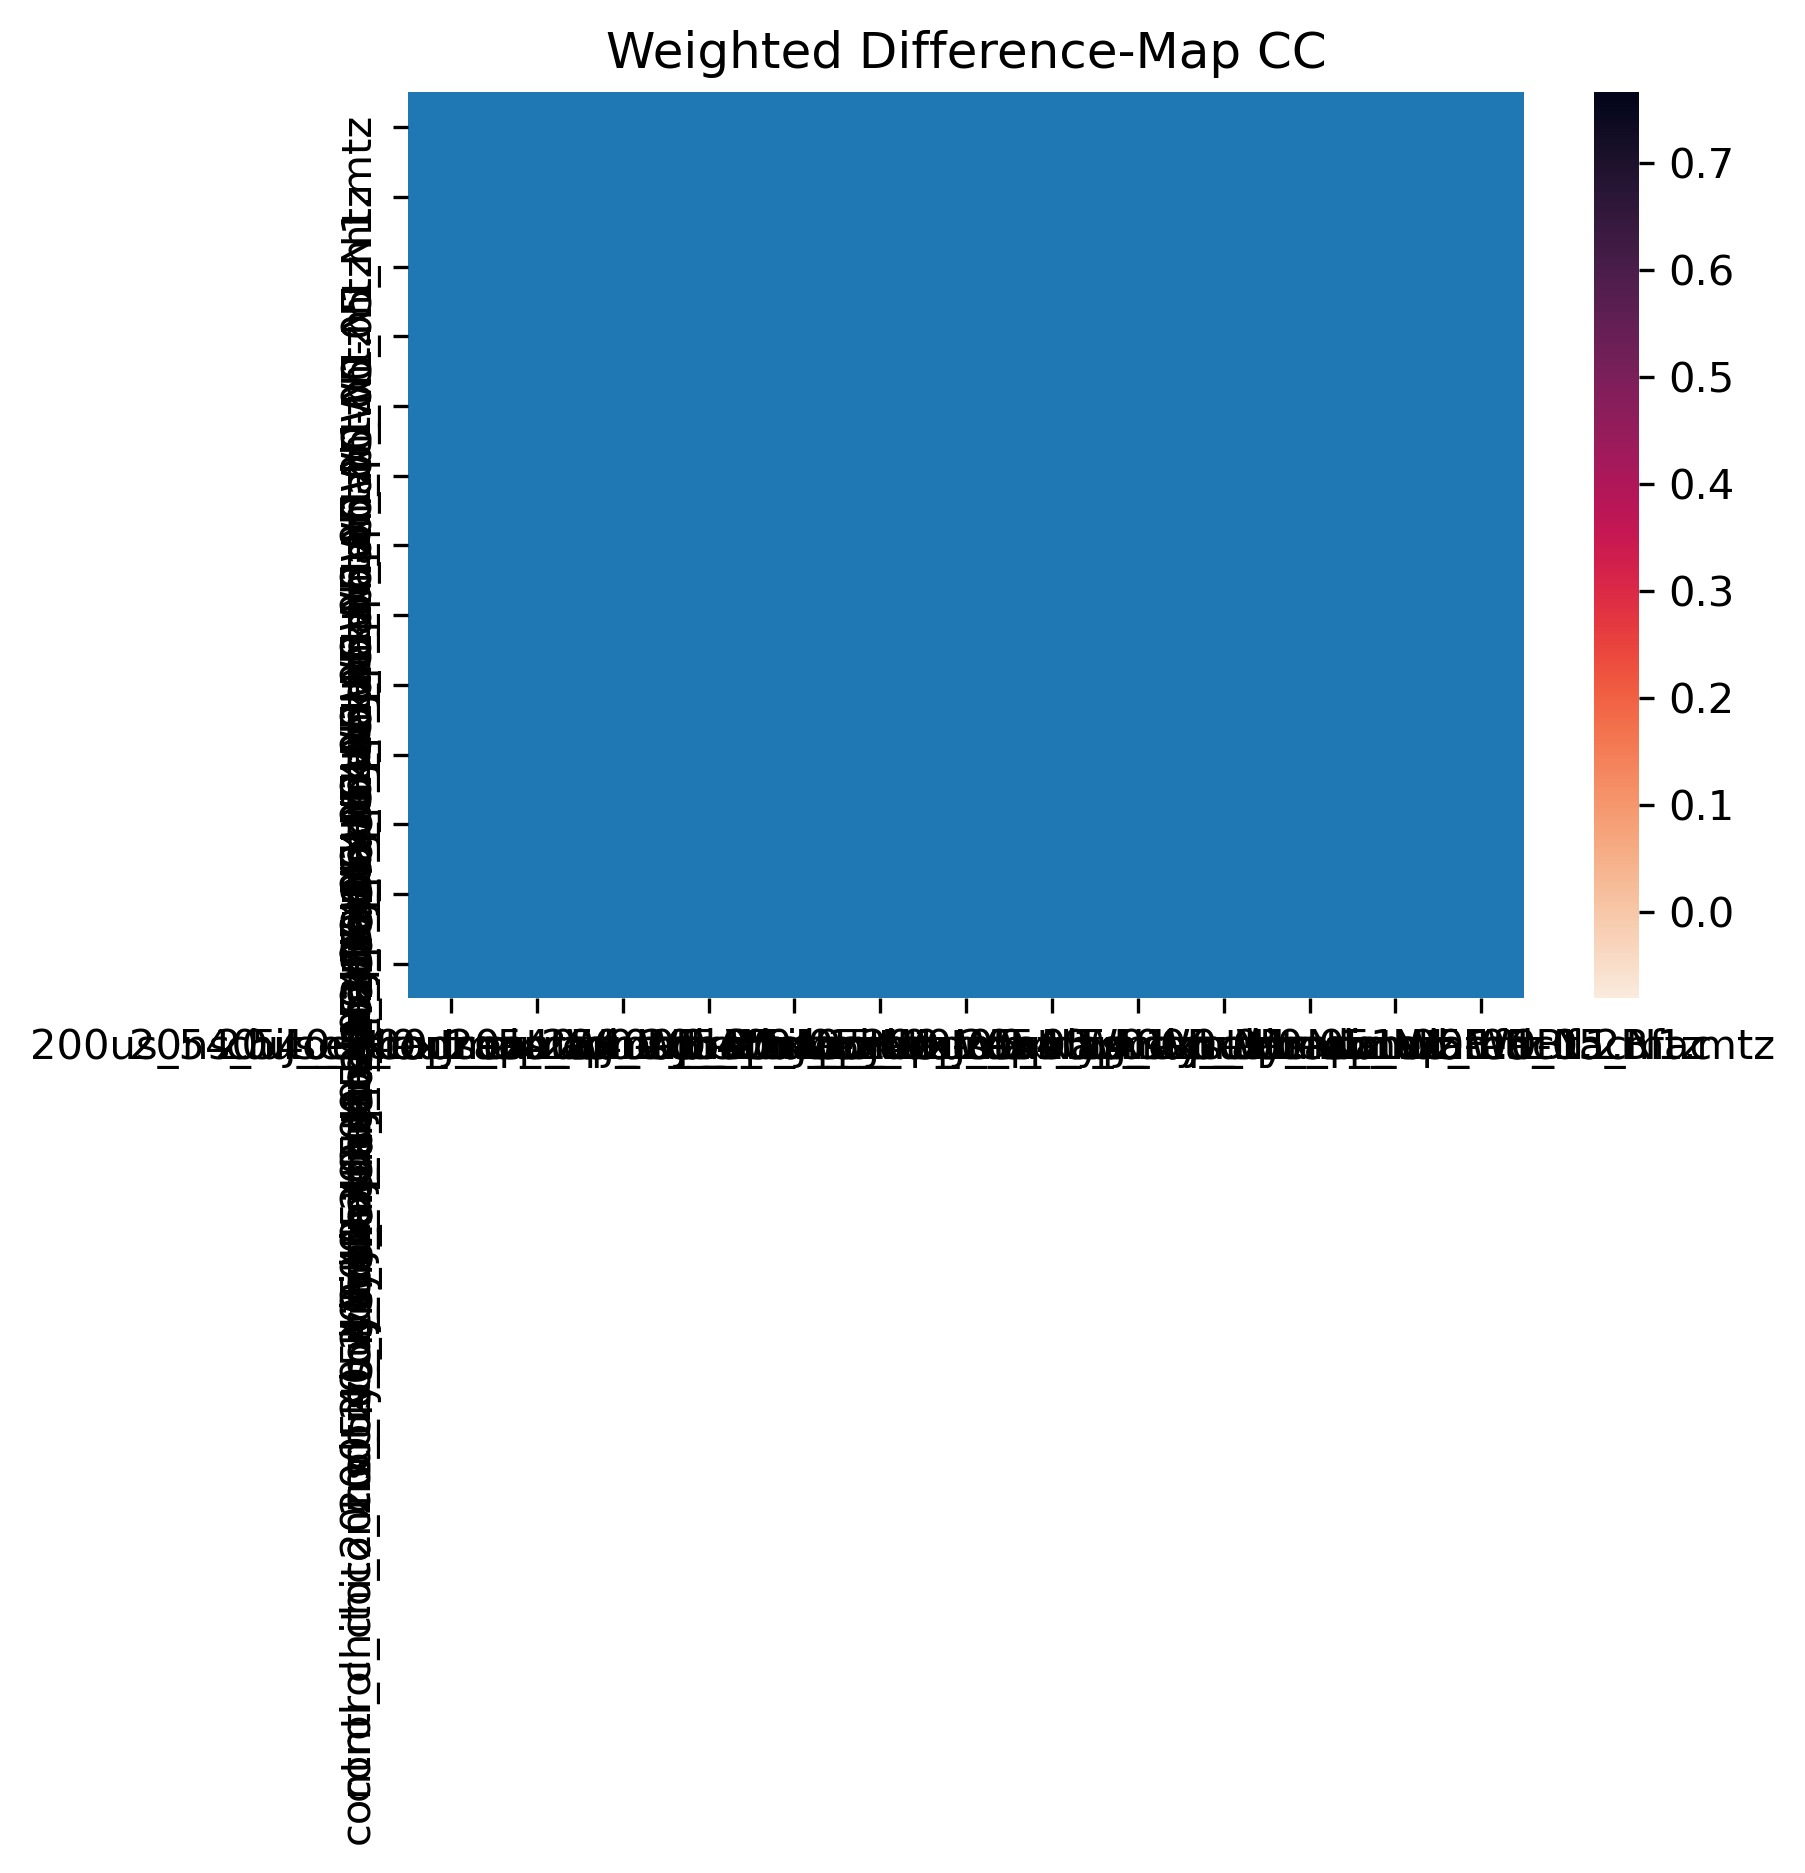

In [18]:
mask_ut=np.triu(np.ones(df.shape)).astype(np.bool)
plt.figure(dpi=300)
plt.title("Weighted Difference-Map CC")
sns.heatmap(df, cmap='rocket_r', mask=mask_ut)

In [19]:
df2 = df.set_index("index")

KeyError: "None of ['index'] are in the columns"

In [20]:
df2

NameError: name 'df2' is not defined

IndexError: arrays used as indices must be of integer (or boolean) type

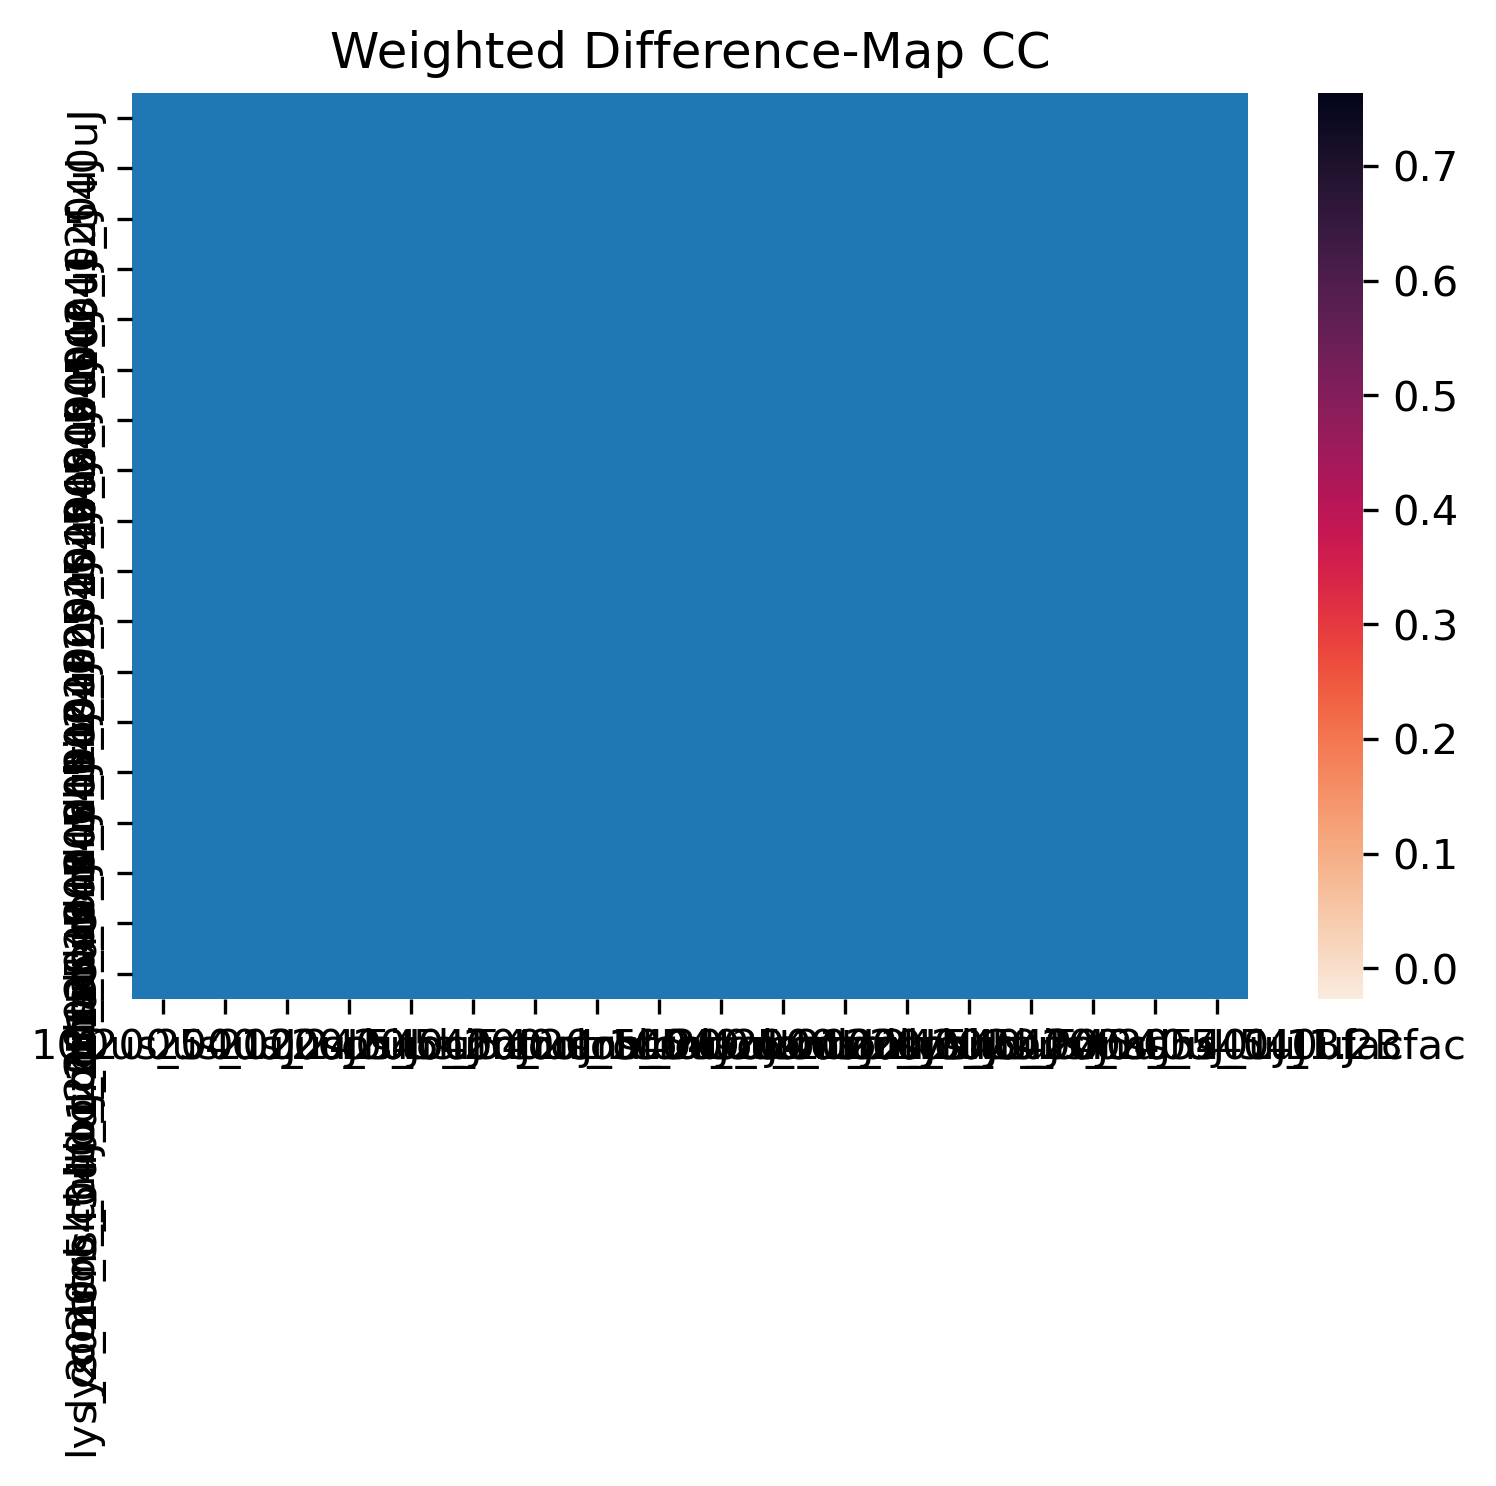

In [142]:
mask_ut=np.triu(np.ones(df2.shape)).astype(np.bool)
plt.figure(dpi=300)
plt.title("Weighted Difference-Map CC")
sns.heatmap(df2, cmap='rocket_r', mask=mask_ut)

In [21]:
# back_in = pd.read_excel("./pairwise_CCs.xlsx", engine="openpyxl", index_col=0)
# back_in_edited = pd.read_excel("./pairwise_CCs_round2_refinedPHI_redoSimMTZs_edited_2.xlsx", engine="openpyxl", index_col=0)
back_in_edited = pd.read_excel("./pairwise_CCs_round3_refinedPHI_resolutionbasedsampling_edited.xlsx", engine="openpyxl", index_col=0)

In [22]:
# cut_list = ["100us_540uJ", "200us_120uJ", "200us_240uJ", "control_100us_540uJ", "control_200us_120uJ", "control_200us_240uJ"]
# back_in_cut_rows = back_in.drop(index=cut_list)
# back_in_cut_rows_and_cols = back_in_cut_rows.drop(columns=cut_list)
# back_in_cut_rows_and_cols

<AxesSubplot:>

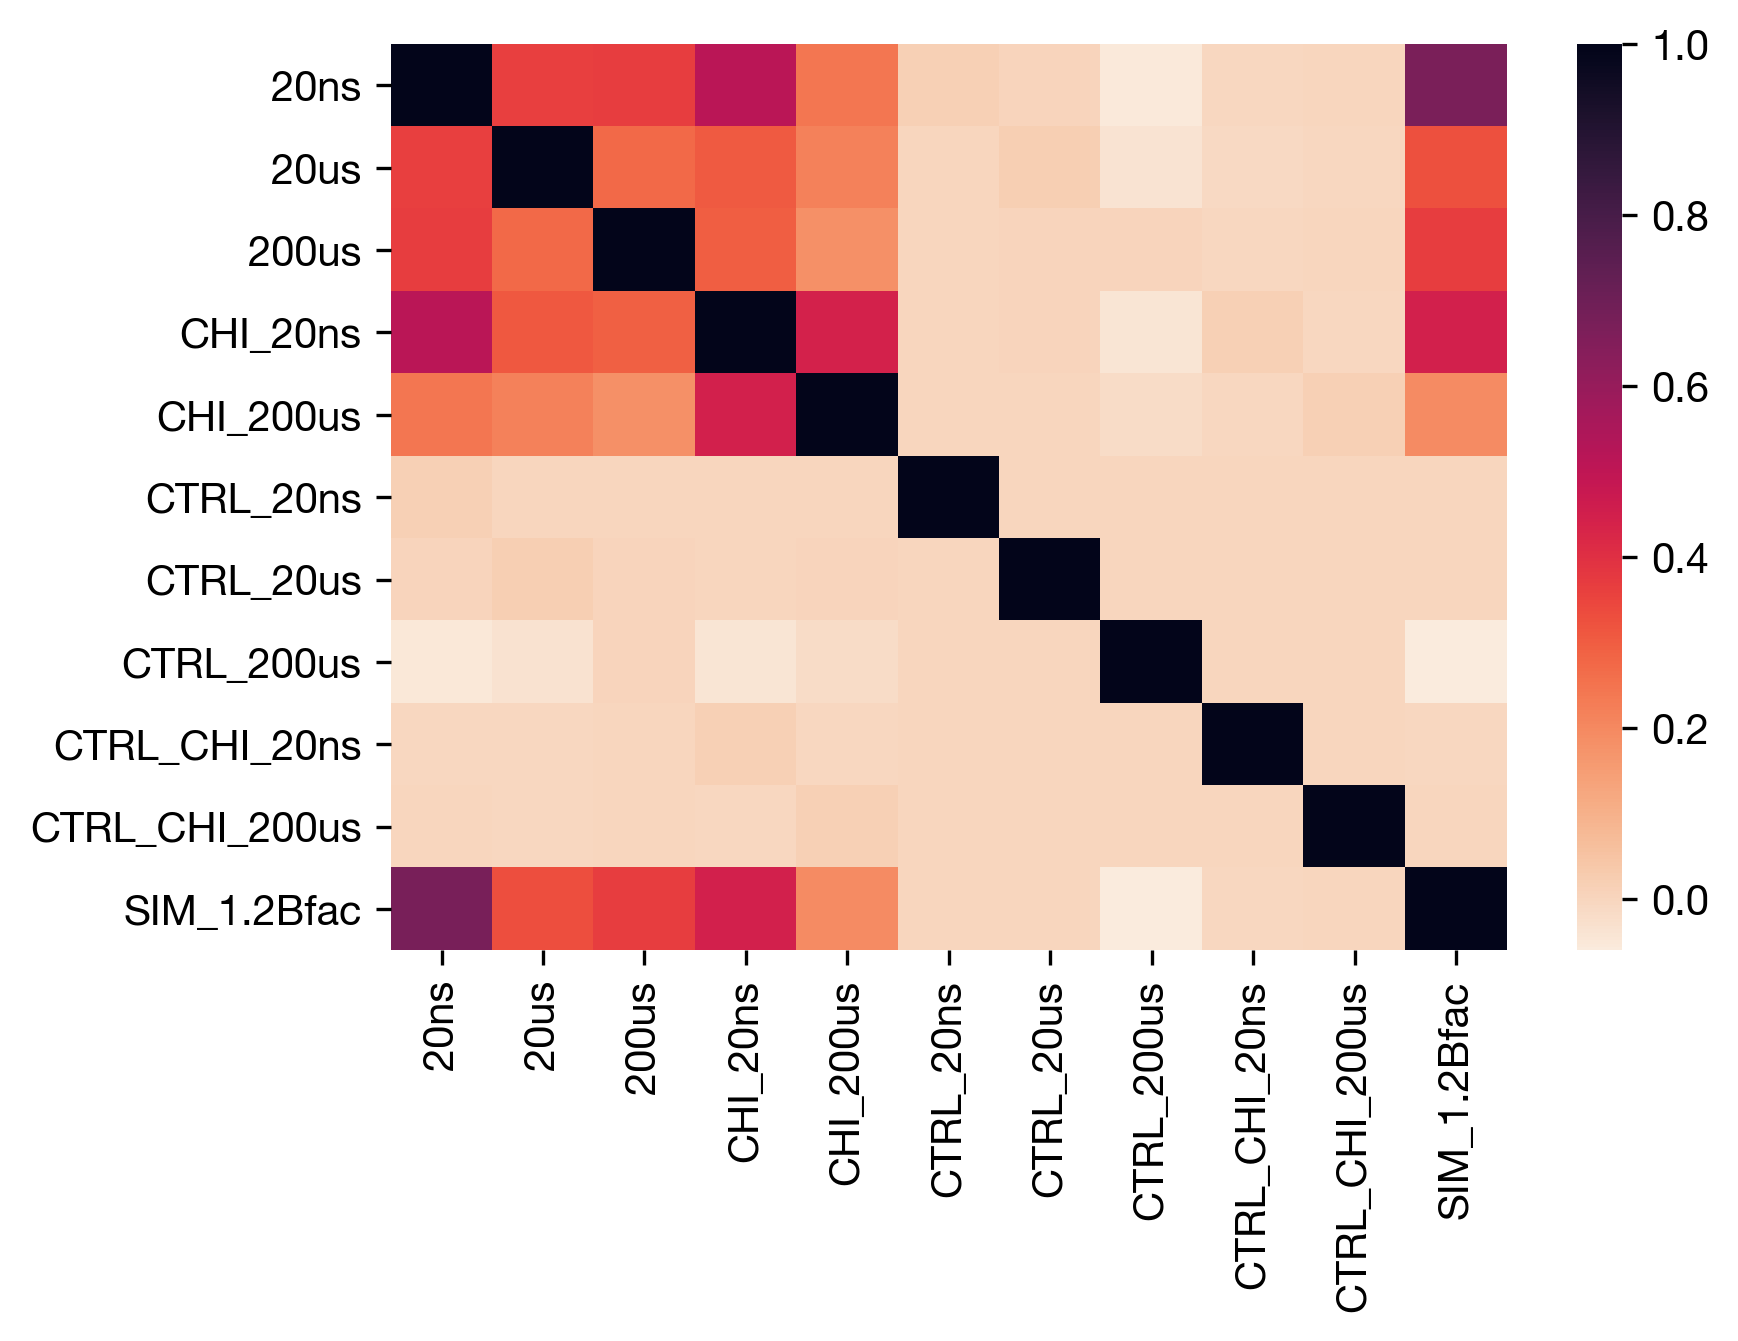

In [23]:
# mask_ut=np.triu(np.ones(back_in.shape)).astype(np.bool)
plt.figure(dpi=300)
# plt.title("Weighted Difference-Map CC")
plt.rcParams.update({'font.sans-serif':'Helvetica Neue'})
# plt.rcParams.update({'font.size': 18})
sns.heatmap(back_in_edited, cmap='rocket_r')

<AxesSubplot:title={'center':'Weighted Difference-Map CC'}>

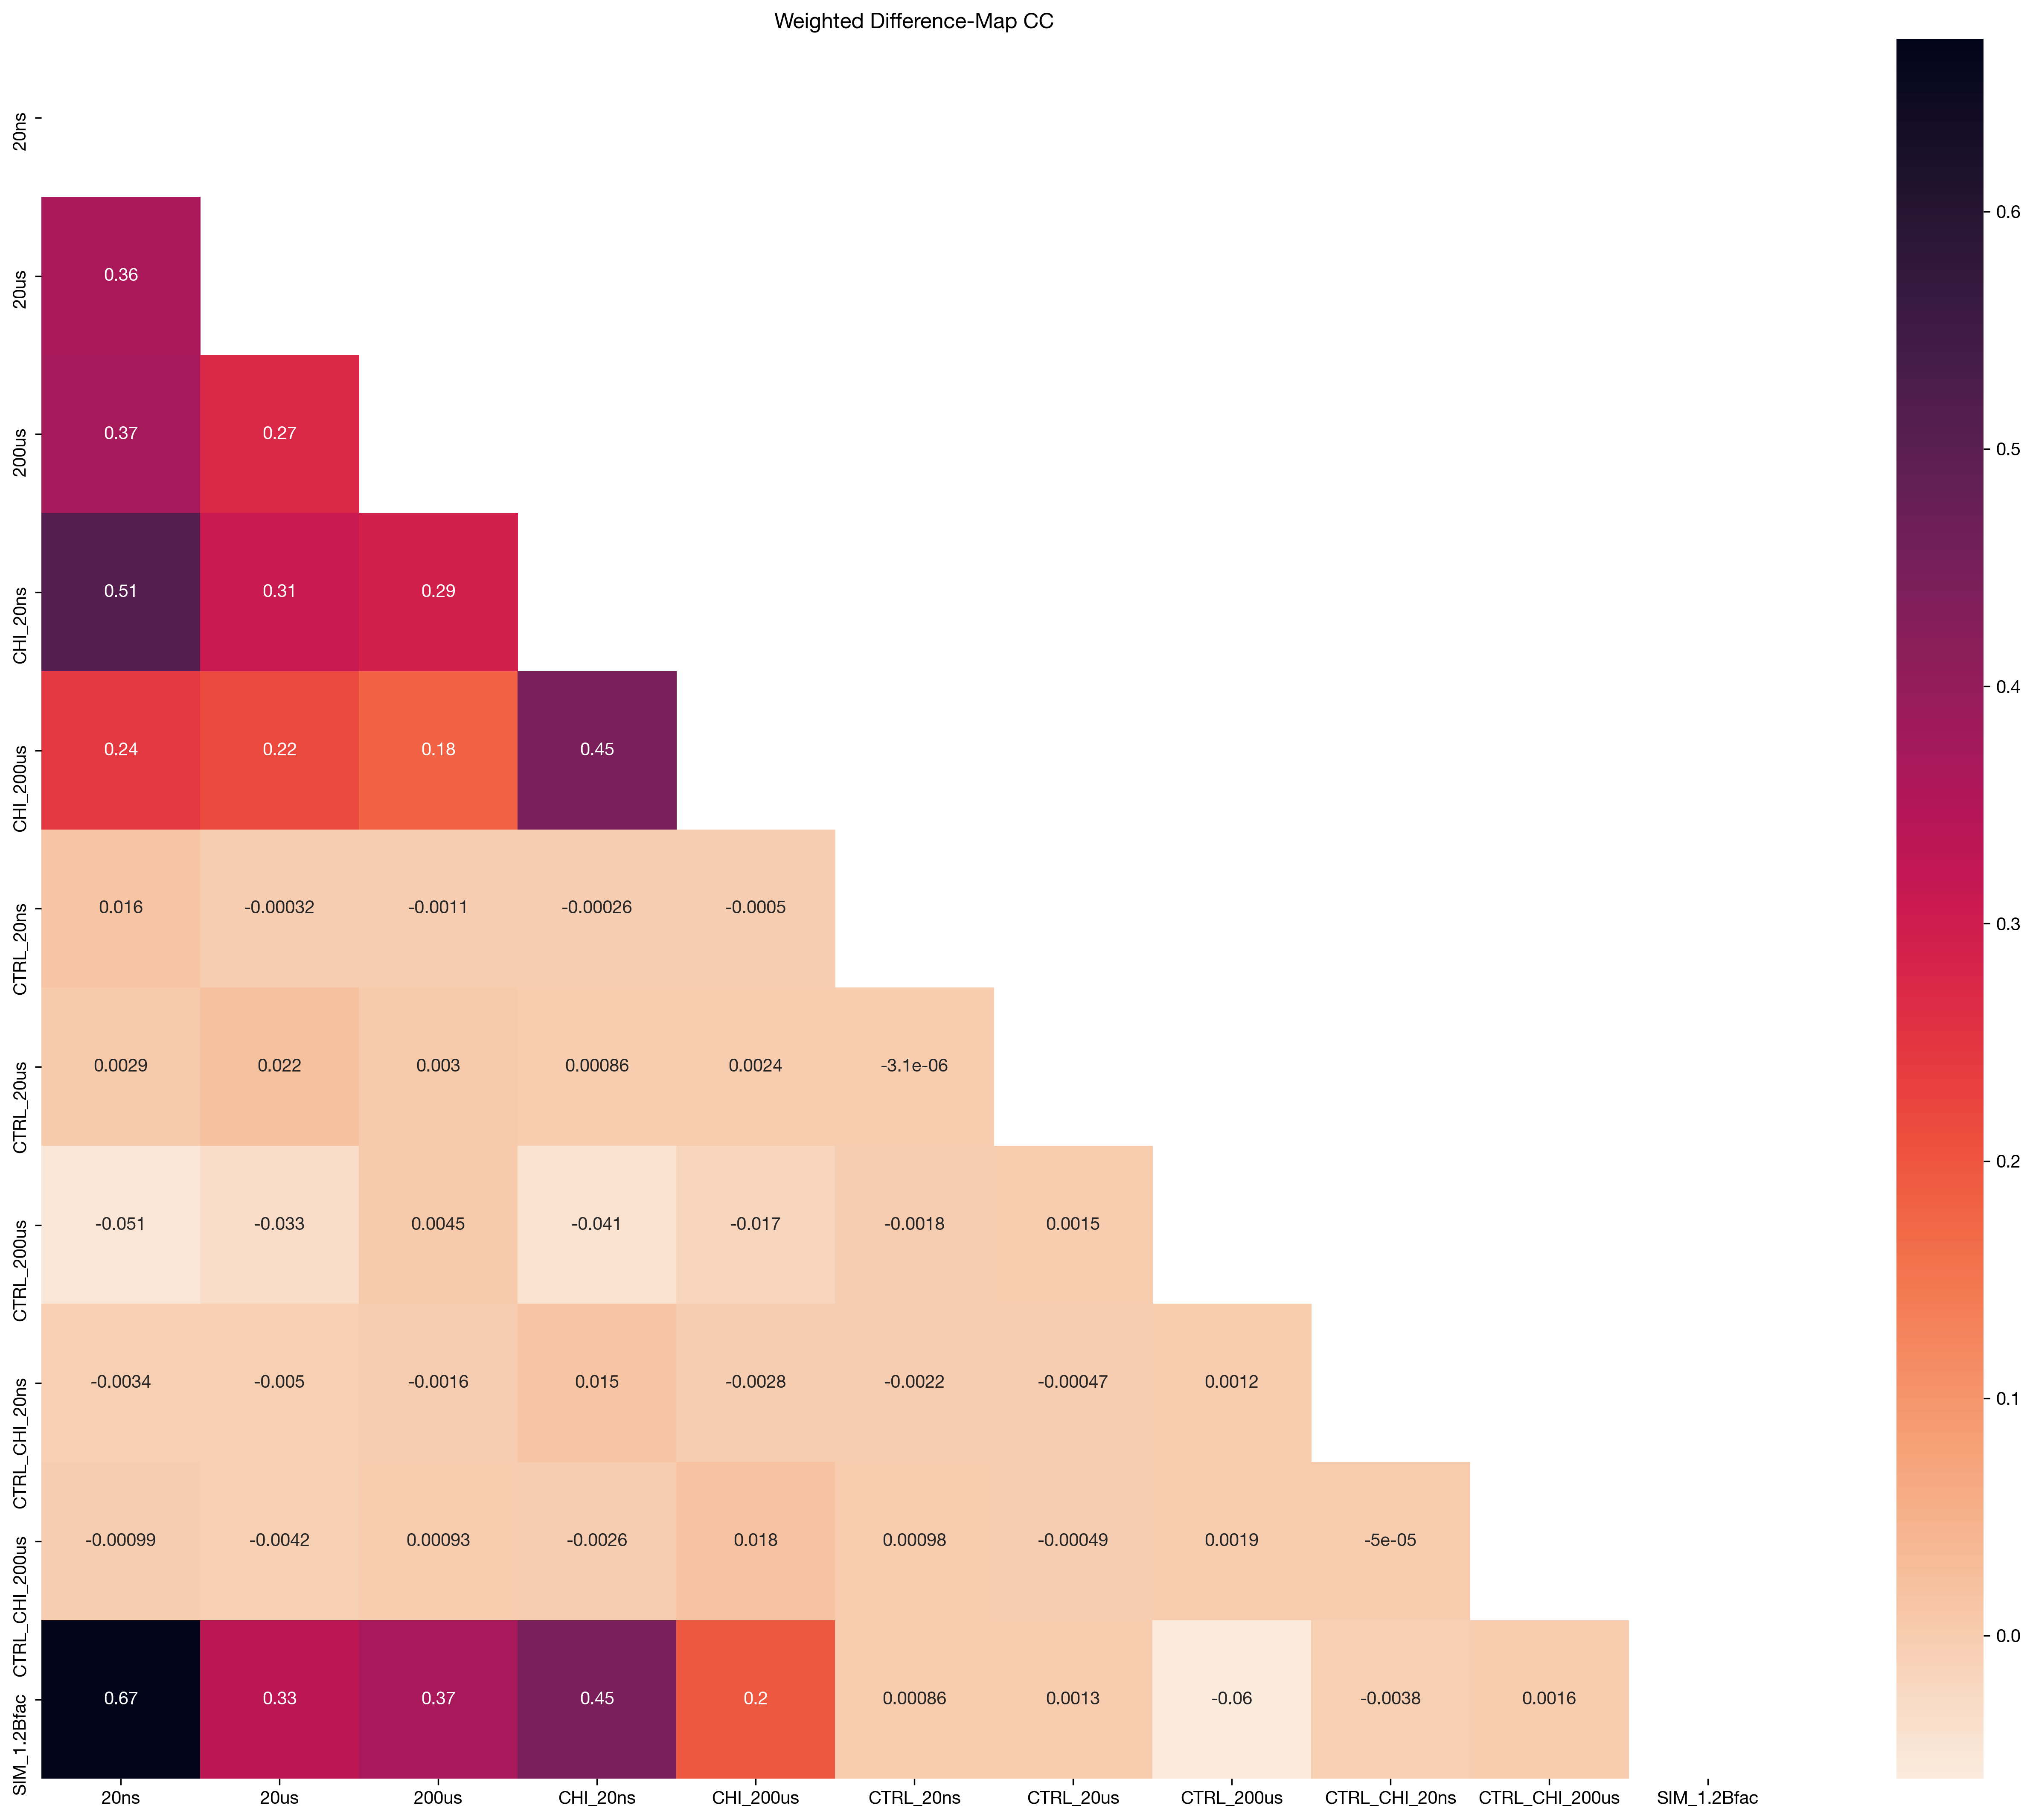

In [24]:
mask_ut=np.triu(np.ones(back_in_edited.shape)).astype(np.bool)
plt.figure(figsize=(22,18), dpi=300)
plt.title("Weighted Difference-Map CC")
sns.heatmap(back_in_edited, cmap='rocket_r', mask=mask_ut, annot=True)